# Анализ рынка общепита Москвы

- Автор: Максимов А.В
- Дата: 02.01.2025

### Цели и задачи проекта

**Цель проекта:**
- Провести исследовательский анализ рынка Москвы

**Задачи:**
- Познакомиться с данными;
- Проверить их корректность;
- Провести предобработку,получив необходимый срез данных;
- Подвести итог и выдать рекомендации на основе выполнения вышеопоставленных задач.

### Описание данных

***Для /datasets/rest_info.csv***

**`id`** - Идентификатор ресторана

**`address`** -  Адрес заведения


**`district`** - Административный район, в котором находится заведение


**`category`** - Категория заведения


**`hours`** - информация о днях и часах работы


**`rating`** - рейтинг заведения по оценкам пользователей в Яндекс Картах


**`chain`** - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым


**`seats`** - количество посадочных мест


***Для /datasets/rest_price.csv***

**`price`** - категория цен в заведении


**`avg_bill`** - строка, которая хранит среднюю стоимость заказа в виде диапазона


**`middle_avg_bill`** - число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»


**`middle_coffee_cup`** - число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»



### Содержимое проекта

**1.Загрузка и знакомство с данными**
- Импорт библиотек
- Загрузка данных
- Объединение датафреймов
- Вывод первых строк данных
- Получение информации о датасете


**2.Предобработка данных**
- Проверка и обработка типов данных
- Подсчет пропусков
- Анализ данных с пропусками
- Обработка пропусков
- Поиск и удаление дубликатов
- Создание нового столбца 


**3.Исследовательский анализ данных**
- Задача 1
- Задача 2
- Задача 3
- Задача 4
- Задача 5
- Задача 6
- Задача 7
- Задача 8
- Задача 9

**5.Итоговый вывод и рекомендации**
- Общий обзор проделанной работы.
- Ответы на исследовательские вопросы, или главные выводы.
- Рекомендации на основе анализа данных.

---

In [1]:
!pip install phik

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import phik_matrix


- Познакомьтесь с данными и изучите общую информацию о них.

In [3]:
df1=pd.read_csv('https://code.s3.yandex.net//datasets/rest_info.csv')
df2=pd.read_csv('https://code.s3.yandex.net//datasets/rest_price.csv')

df1.info()
df2.info()
display(df1.head())
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   mi

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

***Объем данных 1-ого датафрейма почти в 4 раза больше 2-ого. В первом мы можем выдеть информацию о самих заведениях, их расположение, количество мест и тд. Во втором мы видим информацию, больше связанную с заказами посетителей.***

***В 1-ом датафрейме используются правильные типы данных для каждого из столбцов, единственное что можно сделать, так это уменьшить занимаемое место данного датафрема путем замены числовых типов данных на те, которые подойдут по размеру. Видно, что в 1 датафрейме имеются пропуски в 2 стобцах, hours  и seats. Причина появлений этих пропусков может быть такая: в столбце hours, где хранится информацию об открытии и закрытии заведения, может быть там нету четкого графика работы или данных вовсе не существует. В столбце seats, который отвечает за количество людей, которые могут сесть в заведении, может быть там вовсе нету посадочных мест, и все заказы отдают на вынос или работают только по доставке.***

***В 2-ом датафрейме используются правильные типы данных для каждого из столбцов, единственное что можно сделать, так это уменьшить занимаемое место данного датафрема путем замены числовых типов данных на те, которые подойдут по размеру. Во 2-ом датафрейме пропусков больше, чем в 1-ом. Их основное отсутсвие зависит от стобца avg_bill,в нем используется определенные текстовы значения, которые влияют на результат столбцов middle_avg_bill и middle_coffee_cup.***

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [4]:
df = df1.merge(df2,how = 'left', on = 'id')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [5]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df
df= optimize_memory_usage(df)
df.info()

Размер использования памяти: до  0.83 Mb - после  0.65 Mb (22.1%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 665.1+ KB


***В прошлом проекте ревьюер подсказал, как можно автоматизировать систему замены типов данных, решил воспользоваться. Тут мы видим, что числовые типы данных уменшили свой размер. Например столбец chain был размера int64, а теперь стал int8***

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце id: ['0c3e3439a8c64ea5bf6ecd6ca6ae19f0' '045780ada3474c57a2112e505d74b633'
 '1070b6b59144425896c65889347fcff6' ... '62e8c64d4c89467aba608e39ef87616b'
 '06a0db5ecd4842d48cd6350aa923e297' '9d56f8f7a7f74df1a925bc0fd2de8aae']
Уникальные значения в столбце name: ['WoWфли' 'Четыре комнаты' 'Хазри' ... 'Миславнес' 'Самовар' 'Kebab Time']
Уникальные значения в столбце category: ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
Уникальные значения в столбце address: ['Москва, улица Дыбенко, 7/1' 'Москва, улица Дыбенко, 36, корп. 1'
 'Москва, Клязьминская улица, 15' ...
 'Москва, улица Лобачевского, 52, корп. 1'
 'Москва, Болотниковская улица, 52, корп. 2'
 'Москва, Чонгарский бульвар, 26А, корп. 1']
Уникальные значения в столбце district: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный окр

In [7]:
missing_abs = df.isna().sum()
missing_sorted = missing_abs.sort_values(ascending=False)
missin_perc = (missing_sorted / len(df))*100
styled_df = pd.DataFrame({
    'Количество пропусков': missing_sorted, 
    'Процент пропусков': missin_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_df

,Количество пропусков,Процент пропусков
middle_coffee_cup,7871,93.635498
middle_avg_bill,5257,62.538663
price,5091,60.563883
avg_bill,4590,54.603854
seats,3611,42.957411
hours,536,6.376398
district,0,0.000000
category,0,0.000000
name,0,0.000000
id,0,0.000000



***Здесь для столбцов, я решил ничего не менять, так как пустыми вариантыми проще работать, про них главное не забыть***

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [8]:
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())

In [9]:
first_df = len(df)
obvious_duplicates = df.duplicated()
print(f'Кол-во строк до удаления дубликатов: {first_df}')
duplicates = df.duplicated(subset = ['name','address'])
print(f'Кол-во дубликатов в столбцах name и address: {duplicates.sum()}')
print(f'Кол-во явных дубликатов: {obvious_duplicates.sum()}')
df = df.drop_duplicates(subset = ['name','address'],keep ='first')
share = round(duplicates.sum()/first_df,4)*100
print(f'Кол-во строк после удаления дубликатов: {len(df)}')
print(f'Доля удаленных строк:{share}')
dups = df.duplicated().sum()

Кол-во строк до удаления дубликатов: 8406
Кол-во дубликатов в столбцах name и address: 4
Кол-во явных дубликатов: 0
Кол-во строк после удаления дубликатов: 8402
Доля удаленных строк:0.05


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [10]:
def is_24_7(hours):
    if isinstance(hours, str) and 'круглосуточно' in hours and 'ежедневно' in hours:
        return True
    else:
        return False

# Применим функцию к столбцу 'hours' для создания нового столбца
df['is_24_7'] = df['hours'].apply(is_24_7)

# Проверим новый столбец
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(4), int8(1), object(8)
memory usage: 738.5+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

***Дубликатов было немного. Гораздо больше было пропусков в столбцах, нежеели дубликатов. Пропуски, которые заменили на заглушку в виде цифры -1, составляли 62.54% и 93.64% от всех значений в датафрейме. Доля удаленных дубликатов составляет 0.05.Явных дубликатов обнаружено не было***

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

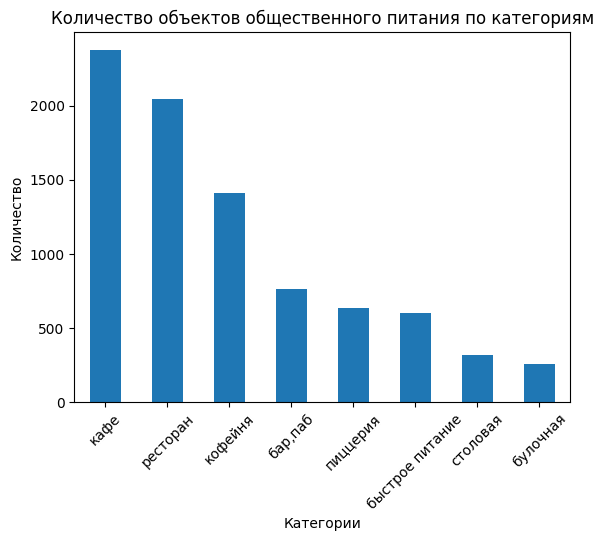


Количество объектов общественного питания по категориям


,Абсолютное число заведений,Процент
category,,
кафе,2376,28.0
ресторан,2042,24.0
кофейня,1413,17.0
"бар,паб",764,9.0
пиццерия,633,8.0
быстрое питание,603,7.0
столовая,315,4.0
булочная,256,3.0


In [11]:
amount_rest = df['category'].value_counts()
amount_rest_percent = (amount_rest / amount_rest.sum()) * 100
amount_rest_summary = pd.DataFrame({'Абсолютное число заведений': amount_rest,
                                 'Процент': amount_rest_percent
                                })
amount_rest = df['category'].value_counts()
amount_rest.plot(kind='bar',
   title='Количество объектов общественного питания по категориям',
   xlabel='Категории',
   ylabel='Количество',
   rot=45
)                                     
plt.show()
print("\nКоличество объектов общественного питания по категориям")
display(round(amount_rest_summary))

***По этим данным можно заметить, что спросом больше всего пользуются заведения типа "кафе", "ресторан" и "кофейня"***

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

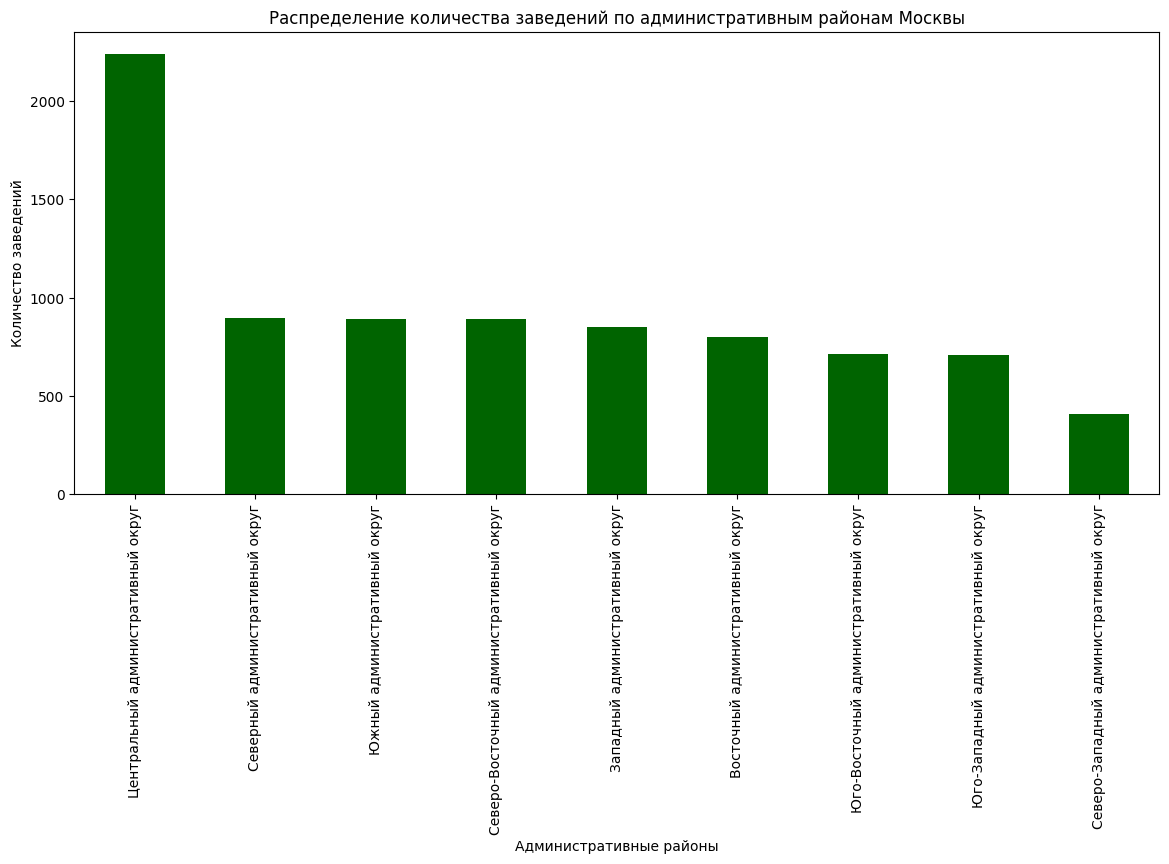


Распределение количества заведений по административным районам Москвы:


,Абсолютное число заведений,Процент
district,,
Центральный административный округ,2242,27.0
Северный административный округ,898,11.0
Южный административный округ,892,11.0
Северо-Восточный административный округ,890,11.0
Западный административный округ,850,10.0
Восточный административный округ,798,9.0
Юго-Восточный административный округ,714,8.0
Юго-Западный административный округ,709,8.0
Северо-Западный административный округ,409,5.0


In [12]:
amount_rest_district = df['district'].value_counts()
amount_rest_district_percent = (amount_rest_district / amount_rest_district.sum()) * 100
district_summary = pd.DataFrame({'Абсолютное число заведений': amount_rest_district,
                                 'Процент': amount_rest_district_percent
                                })

amount_rest_district.plot(kind='bar',
   title='Распределение количества заведений по административным районам Москвы',
   xlabel='Административные районы',
   ylabel='Количество заведений',
   rot=90,
   figsize=(14, 6),
   color = 'darkgreen'                       
)                                     
plt.show()
print("\nРаспределение количества заведений по административным районам Москвы:")
display(round(district_summary))

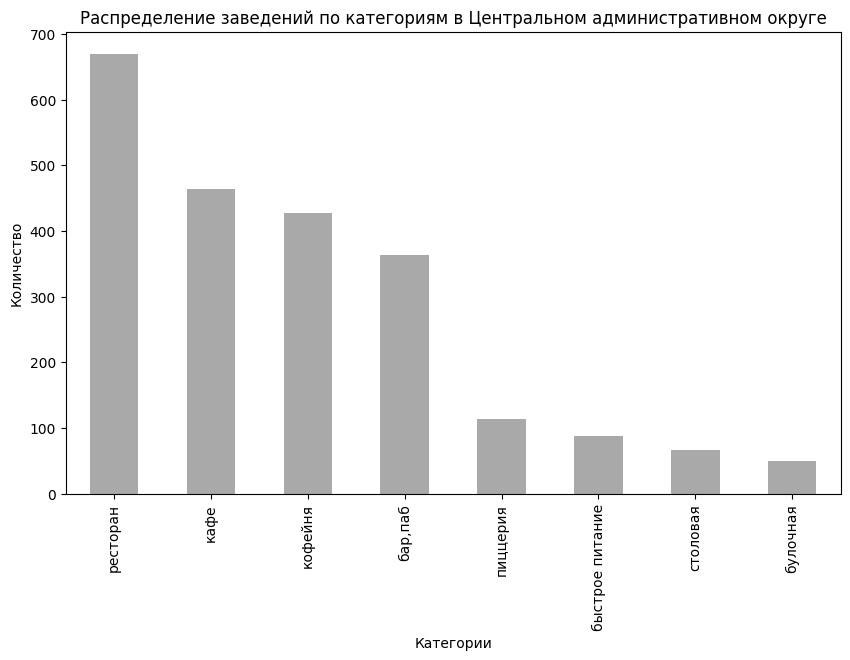


Количество заведений по категориям в Центральном административном округе


,Абсолютное число заведений,Процент
category,,
ресторан,670,30.0
кафе,464,21.0
кофейня,428,19.0
"бар,паб",364,16.0
пиццерия,113,5.0
быстрое питание,87,4.0
столовая,66,3.0
булочная,50,2.0


In [13]:
central_districts = df[df['district'] == 'Центральный административный округ']
amount_rest_categor_central = central_districts['category'].value_counts()
amount_rest_categor_central_percent = (amount_rest_categor_central / amount_rest_categor_central.sum()) * 100
categor_central_summary = pd.DataFrame({'Абсолютное число заведений': amount_rest_categor_central,
                                        'Процент': amount_rest_categor_central_percent
                                       })

amount_rest_categor_central.plot(kind='bar',
   title='Распределение заведений по категориям в Центральном административном округе',
   xlabel='Категории',
   ylabel='Количество',
   rot=90,
   figsize=(10, 6),
   color = 'darkgrey'                               
)                                     
plt.show()
print("\nКоличество заведений по категориям в Центральном административном округе")
display(round(categor_central_summary))

***Тут можно заметить, в Центральном административном округе находится больше всего заведений, если сранивать с ближайшим по количеству регионом, то у Центрального административного округа значение практически в 3 раза больше, чем в Северном административном округе***
***Так же, можно заметить, что в Центральном административном округе находится больше всего ресторанов, по сравнению с остальными категориями***

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

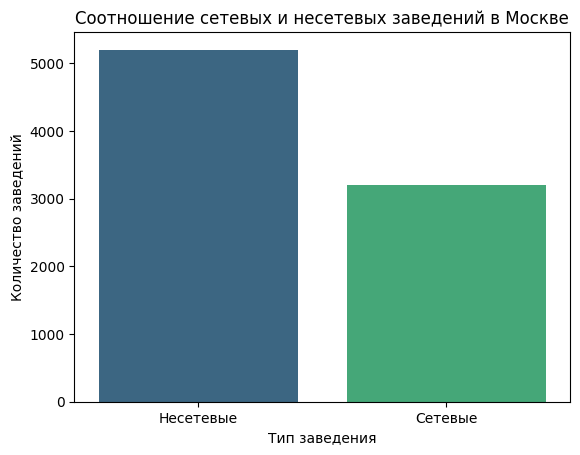


Распределение сетевых и несетевых заведений в Москве:


,Абсолютное число заведений,Процент
Несетевые,5199,62.0
Сетевые,3203,38.0


In [14]:
chain_counts = df['chain'].value_counts()
chain_percent = (chain_counts / chain_counts.sum()) * 100

chain_summary = pd.DataFrame({
    'Абсолютное число заведений': chain_counts,
    'Процент': chain_percent
                            })

chain_summary.index = ['Несетевые', 'Сетевые']

sns.barplot(x=chain_summary.index, y=chain_summary['Абсолютное число заведений'],hue=chain_summary.index, palette='viridis')
plt.title("Соотношение сетевых и несетевых заведений в Москве")
plt.xlabel("Тип заведения")
plt.ylabel("Количество заведений")
plt.show()


print("\nРаспределение сетевых и несетевых заведений в Москве:")
display(round(chain_summary))

In [15]:
#Группируем данные по категории заведения и типу сети (сетевое/несетевое)
category_chain_ratio = df.groupby(['category', 'chain']).size().unstack(fill_value=0)

# Добавляем столбец с общим количеством заведений по категории
category_chain_ratio['total'] = category_chain_ratio[0] + category_chain_ratio[1]

# Рассчитываем процент сетевых заведений в каждой категории
category_chain_ratio['percent_networked'] = (category_chain_ratio[1] / category_chain_ratio['total']) * 100

category_chain_ratio = category_chain_ratio.sort_values(by='percent_networked', ascending=False)

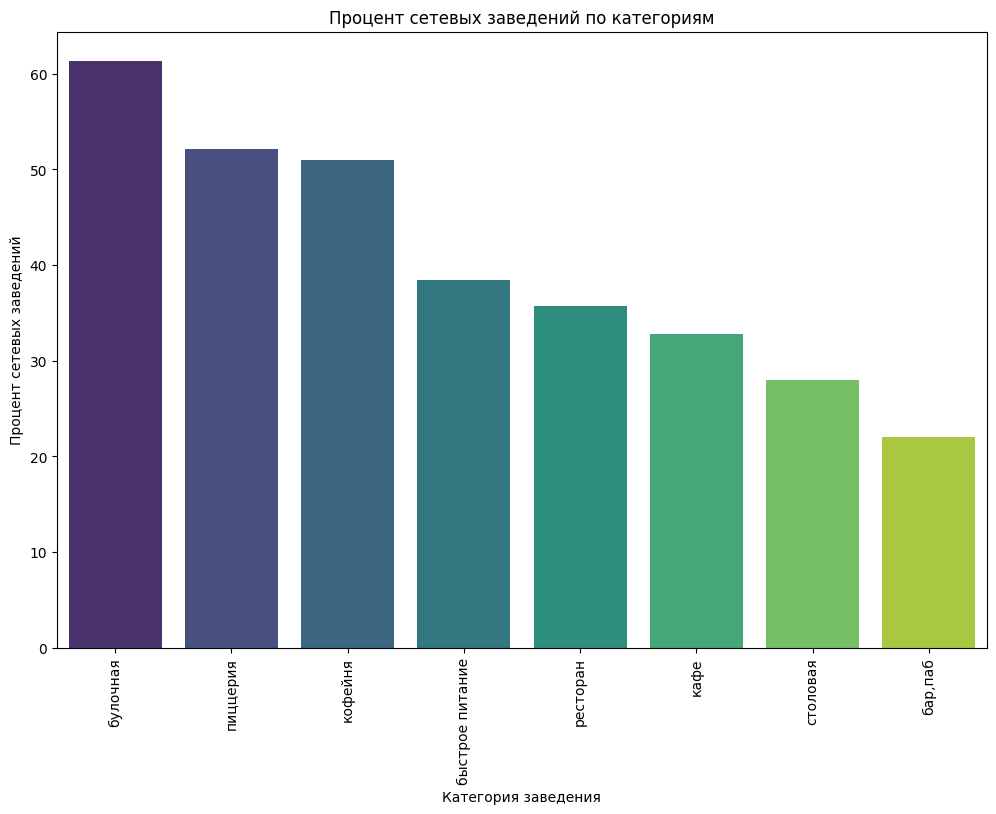


Таблица с результатами по категориям заведений:


,Заведений,Несетевых,Сетевых,Процент сетевых
category,,,,
булочная,256,99,157,61.0
пиццерия,633,303,330,52.0
кофейня,1413,693,720,51.0
быстрое питание,603,371,232,38.0
ресторан,2042,1313,729,36.0
кафе,2376,1597,779,33.0
столовая,315,227,88,28.0
"бар,паб",764,596,168,22.0


In [16]:
category_chain_ratio = category_chain_ratio[['total', 0, 1, 'percent_networked']]
category_chain_ratio.columns = ['Заведений', 'Несетевых', 'Сетевых', 'Процент сетевых']

plt.figure(figsize=(12, 8))
sns.barplot(x=category_chain_ratio.index, y=category_chain_ratio['Процент сетевых'],hue=category_chain_ratio.index, palette='viridis',legend = False)
plt.title('Процент сетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Процент сетевых заведений')
plt.xticks(rotation=90)
plt.show()

print("\nТаблица с результатами по категориям заведений:")
display(round(category_chain_ratio))

***В этой визуацлизации видно, что булочная составляет 61% сетевых заведений, это больше чем у васех остальных. Ближайшая категория - это пиццерия, ее процент сетевых заведений составляет 52%"***

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


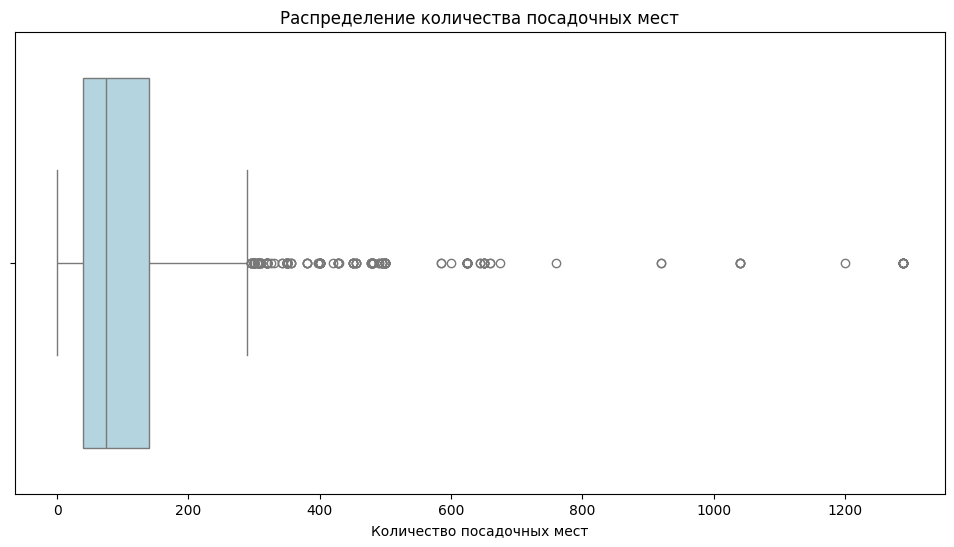

Основные статистики по количеству посадочных мест:


count    4792.0
mean      108.0
std       123.0
min         0.0
25%        40.0
50%        75.0
75%       140.0
max      1288.0
Name: seats, dtype: float64

In [17]:
seats_statistics = df['seats'].describe()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['seats'], color='lightblue')
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.show()

print("Основные статистики по количеству посадочных мест:")
display(round(seats_statistics))

In [18]:
outliers = df[(df['seats'] > 500)]

print("\nЗаведения с количеством посадочных мест более 500:")
display(outliers[['name', 'category', 'seats']].head(15))


Заведения с количеством посадочных мест более 500:


,name,category,seats
1326,нам,"бар,паб",625.0
1351,максима пицца,пиццерия,625.0
1355,страдивари,ресторан,625.0
1367,академия,пиццерия,625.0
1380,север-метрополь,кофейня,625.0
1385,чайхона на соколе,кафе,625.0
1393,кулинарная лавка братьев караваевых,кафе,625.0
1442,abc coffee roasters,кофейня,625.0
1446,9 bar coffee,кофейня,625.0
1464,находка,ресторан,625.0


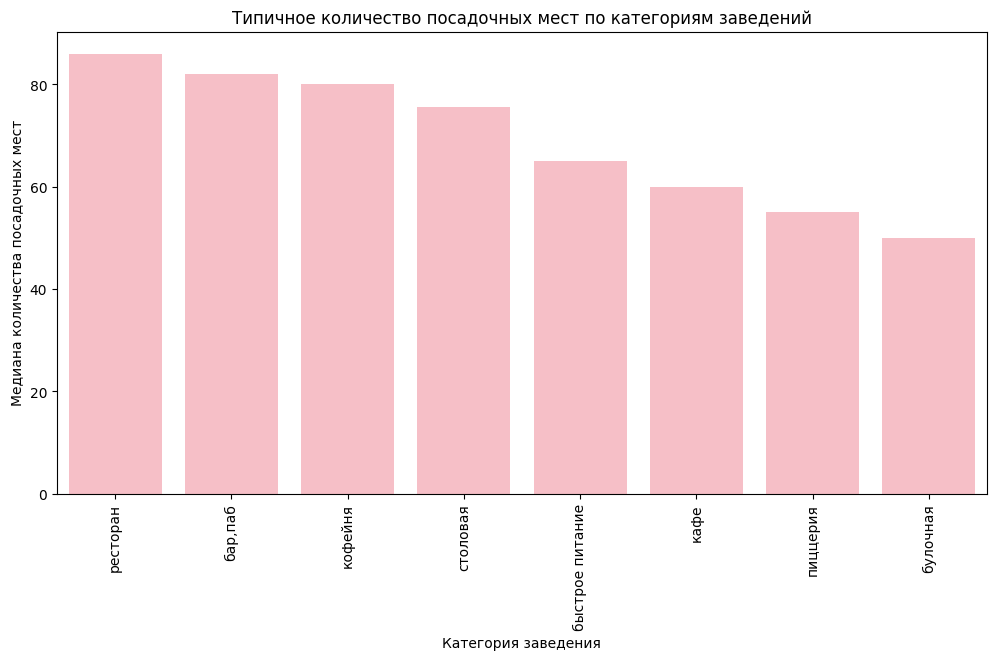


Медианное количество посадочных мест по категориям:
category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float32


In [19]:
category_seats = df.groupby('category')['seats'].median().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_seats.index, y=category_seats.values, color = 'lightpink')
plt.title('Типичное количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Медиана количества посадочных мест')
plt.xticks(rotation=90)
plt.show()

print("\nМедианное количество посадочных мест по категориям:")
print(category_seats)

***Здесь мы видим, что есть аномальные значение в стобцах seats, которые уходят за значение 500. Почему могут быть такие выборосы? Я считаю, что либо ошибка заполнения, либо заведения расположенны в тороговых центрах, где места между некоторым заведениями могут быть общими. Также заметно, что в ресторанах и пабах больше всего посадочных мест, чем в остальных, хотя значения с кофейней весьма близки к значению посадочных мест в баре***

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

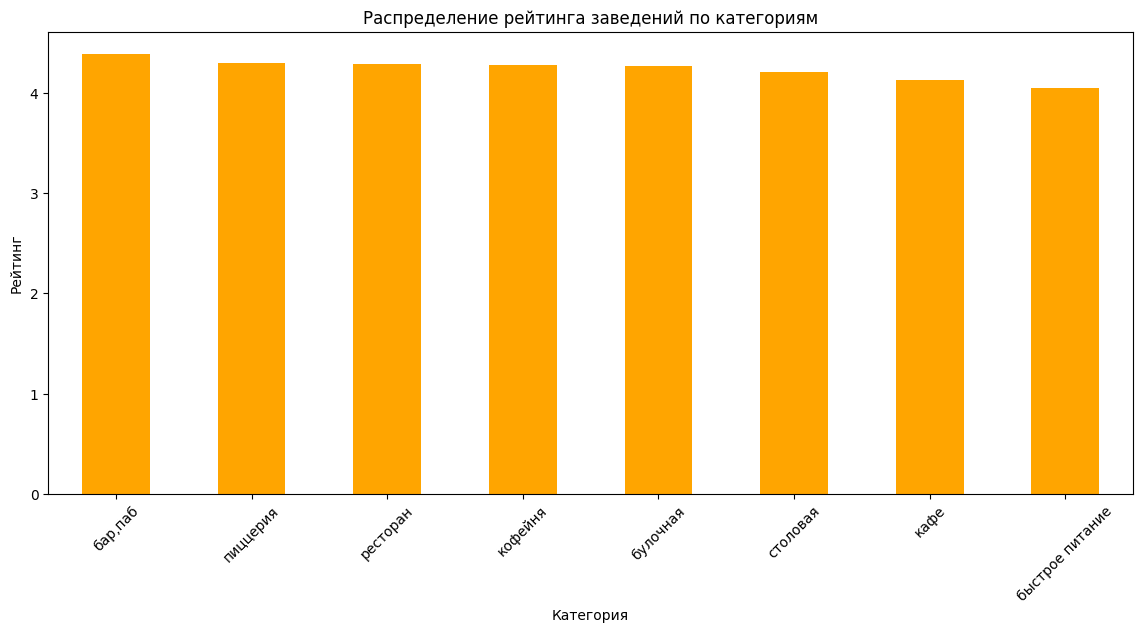


Основные статистики по рейтингу заведений:


count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


Рейтинг по категориям заведений Москвы


category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float32

In [20]:
seats_statistics = df['rating'].describe()
category_mean_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
category_mean_rating.plot(kind='bar',
   title='Распределение рейтинга заведений по категориям',
   xlabel='Категория',
   ylabel='Рейтинг',
   rot=45,
   figsize=(14, 6),
   color = 'orange'
)                                     
plt.show()
print("\nОсновные статистики по рейтингу заведений:")
display(seats_statistics)
print("\nРейтинг по категориям заведений Москвы")
display(round(category_mean_rating,2))

***По визуализации мы видим, что самый высокий средний рейтинг на основе оценок пользователей в приложении Яндекс Карты принадлежит категории заведений "барю,паб. Но разница в среднем рейтинге по сравнению с остальными категориями заведений маленькая***

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [ ]:
variables_for_phik = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']

interval_cols = ['rating', 'chain', 'seats']

phik_matrix = df[variables_for_phik].phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(10, 6))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матрица phi_k-корреляции рейтинга заведений с другими параметрами")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['category'], y=df['rating'], alpha=0.6)
plt.title('Зависимость рейтинга от категории цен в заведении')
plt.xlabel('Категории заведений')
plt.ylabel('Рейтинг')
plt.show()

***Здесь мы видим сильную зависимость по категории заведений и по ценовой категории, так же можно подметить, что столбец district и seats имеют не малеькую корреляцию. Возможно округ зависит на количество посетителей, следовательно и кол-во мест***

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [ ]:
top_15_networks = (df[df['chain'] == 1]
                .groupby('name')
                .agg(num_restaurants=('name', 'count'),
                    avg_rating=('rating', 'mean'),
                    category=('category', 'first'))
                    .sort_values(by='num_restaurants',ascending=False)
                    .head(15)
               )

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(y=top_15_networks.index, x=top_15_networks['num_restaurants'],hue = top_15_networks.index, palette='viridis', ax=ax1)
ax1.set_xlabel('Количество заведений')
ax1.set_ylabel('Название сети')
ax1.set_title('Топ-15 популярных сетевых заведений в Москве')
plt.show()


In [ ]:
fig, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(y=top_15_networks.index, x=top_15_networks['avg_rating'],hue = top_15_networks.index,palette='coolwarm', ax=ax2)
ax2.set_xlabel('Средний рейтинг')
ax2.set_ylabel('Название сети')
ax2.set_title('Средний рейтинг топ-15 популярных сетевых заведений')

plt.xlim(0, 5)
plt.show()
display(round(top_15_networks,2))

***Тут мы видим топ 15 самых популярных сетей заведений в Москве.Самым большим сетевым заведением является "шоколадница". У него 120 заведений по всей Москве, но ее средний рейтинг не является самим больших среди данного топа. Самый большой средний рейтинг у заведения буханка. Средний рейтинг равен 4.40 из 5***

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [ ]:
district_avg_price = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=district_avg_price.index, y=district_avg_price.values,hue = district_avg_price.index, palette='Blues_d')
plt.title('Средний чек по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек (руб.)')
plt.xticks(rotation=90)
plt.show()
display(round(district_avg_price))

In [ ]:
# Добавим новый столбец с классификацией на центральные и нецентральные районы
df['is_central'] = df['district'].apply(lambda x: 1 if x == 'Центральный административный округ' else 0)
df['is_central'] = df['is_central'].astype(np.int8)
# Рассчитаем средний чек для центральных и нецентральных районов
central_avg_price = df.groupby('is_central')['middle_avg_bill'].mean()

# Визуализируем разницу в среднем чеке между центральными и нецентральными районами
plt.figure(figsize=(8, 6))
sns.barplot(x=central_avg_price.index, y=central_avg_price.values,hue = central_avg_price.index,  palette='viridis',legend = False)
plt.title('Средний чек в центральных и нецентральных районах Москвы')
plt.xlabel('Тип района (Центральный/Не центральный)')
plt.ylabel('Средний чек (руб.)')
plt.xticks([0, 1], ['Не центральный', 'Центральный'])
plt.show()

# Выведем результат
print("Средний чек в центральных и нецентральных районах:")
display(round(central_avg_price))

***Перед нами 2 визуализации, в которых показывается, что средний чек в Центральном административном округе больше чем в остальных округах.***

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [ ]:
working_hours_by_category = df.groupby(['category', 'is_24_7']).size().sort_values(ascending = False)
working_hours_by_category_df = working_hours_by_category.reset_index()
working_hours_by_category_df.columns = ['Категория заведения', 'is_24_7', 'Количество заведений']

plt.figure(figsize=(12, 8))
sns.countplot(x='category', hue='is_24_7', data=df, palette='Set2')
plt.title('Часы работы заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.show()

working_hours_by_category_df

***На данной визуацлизации видно, что большая часть заведений не работает 24/7. Максимальное значение у заведения, которое работает круглые сутки является 267. Всего 267 заведений категории кафе работают круглосуточно, сравнивая ту же категорию, но когда оно работает не круглосуточно, таких заведений 2109***

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

***Я бы отметил несколько выполненных задач, которые я считаю важными для начала своего бизнеса. Задачи №1,№2,№7 и №8. Первые 2 задачи дают нам понять, каких категорий заведений больше всего в Москве, и в каких округах их находится больше, чем в других. Так мы можем понять, насколько много будет конкурентов в определенном округе и к каким категориям они себя относят.Задачи № 7 и №8 показывают нам самые популярные сети заведений, что опять же говорит нам о конкурентах на рынке. А задача №8 дает нам возможность опредилить среднюю прибыль с 1 чека в каждом округе.***

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

***В результате выполнения всех задач, у нас были добавлены несколько столбцов с числовыми данными, которые нам позволили подсчитать корреляцию и был добавлен отдельно стобец is_central, который обозначет, что это центральный район, так же было добавлено булевый столбец is_24_7, в котором обозначется, работает ли заведение круглосуточно и ежедневно.***

***Судя по результатам, можно сказать, что прибыль в Центральном административном округе самая большая, по сравнению с остальными регионами. Средний чек ЦАО составляет - 1191, тем временем когда у последующего региона ЗАО средний чек составляет 1053.Третье место занимает САО, с среднии чеком 928. В ЦАО 30% заведений составляют рестораны, это 670 заведений, ближайшее значение к нему - это кафе, кол-во заведений в ЦАО составляет 464 заведения.Так же в ЦАО открыто больше всего заведений, процент от всех заведений в Москве составляет 27%.Точное количество равно 2242. Ближайший преследователь по кол-ву заведений в районе это Северный административный округ, в котором количество заведений составляет 898. В процентном соотношении это 11% от всех заведений в Москве.Рейтинг заведений наибольшим образом коррелирует с ценовой категорией и категорией заведения, целых 0.57 из 1. Заведению с высокой ценовой категорией, как правило, приписывается более высокий рейтинг, что может быть связано с качеством сервиса или предлагаемых услуг***

***Судя по вышепересиленным данным, для успешного открытия нового заведения в Москве лучшим выбором будет ресторан или кафе в ЦАО, ориентированный на премиальный сервис. В качестве альтернативы можно рассмотреть Северный административный округ с более низкой конкуренцией, но всё ещё высоким спросом.***